In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!nvidia-smi

Sat May 11 17:51:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
%cd /content/

/content


In [ ]:
%rm -rf darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 13 (delta 4), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.42 MiB | 12.91 MiB/s, done.
Resolving deltas: 100% (10671/10671), done.


In [ ]:
'''
adjust the darknet Makefile to make use of the GPU, OpenCV, CUDNN, CPU Utilies etc...
'''
%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

%cat Makefile

In [ ]:
%cd /content/darknet/
!make

In [ ]:
%cd /content

!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights -O yolov4-tiny.weights

In [ ]:
import cv2
import matplotlib.pyplot as plt

def imShow(path):
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

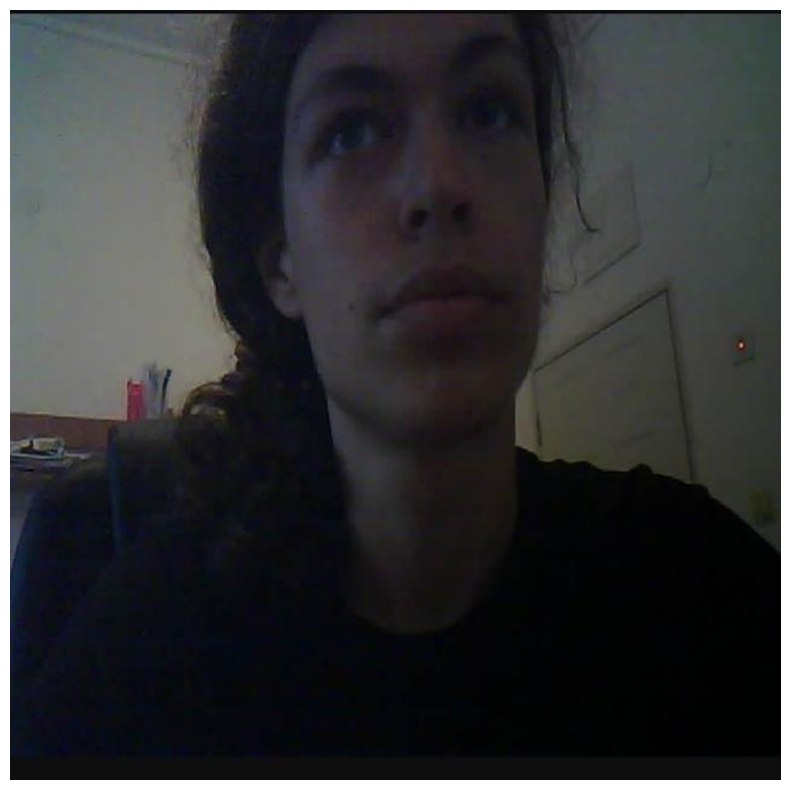

0 0.51484375 0.278125 0.375 0.53046875

In [ ]:
imShow("/content/dataset/test/1048c373-589d-46df-bc5c-5698e4350fa7_jpeg.rf.d267231db69707669558be7c70655944.jpg")
%cat /content/dataset/test/1048c373-589d-46df-bc5c-5698e4350fa7_jpeg.rf.d267231db69707669558be7c70655944.txt

In [ ]:
'''
a simple funtion to find the number of labels
'''
%cd /content

def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('/content/dataset/train/_darknet.labels')
num_classes

/content


1

In [ ]:
%cat /content/dataset/train/_darknet.labels

Shahar

In [ ]:

'''
Create .data and .txt files
'''
%cd /content

import os

if not os.path.exists('backup'):
  %mkdir backup

with open('dataset/train.data', 'w') as out:
  out.write(f'classes = {num_classes}\n')
  out.write('train = /content/dataset/train.txt\n')
  out.write('valid = /content/dataset/valid.txt\n')
  out.write('names = /content/dataset/train/_darknet.labels\n')
  out.write('backup = /content/backup')

with open('dataset/train.txt', 'w') as out:
  for img in os.listdir('/content/dataset/train'):
      if img.endswith('.jpeg'):
        out.write(f'/content/dataset/train/{img}\n')
      elif img.endswith('.jpg'):
        out.write(f'/content/dataset/train/{img}\n')

with open('dataset/valid.txt', 'w') as out:
  for img in os.listdir('/content/dataset/valid'):
      if img.endswith('.jpeg'):
        out.write(f'/content/dataset/valid/{img}\n')
      elif img.endswith('.jpg'):
        out.write(f'/content/dataset/valid/{img}\n')

/content


In [ ]:
%cat /content/dataset/train.data

classes = 1
train = /content/dataset/train.txt
valid = /content/dataset/valid.txt
names = /content/dataset/train/_darknet.labels
backup = /content/backup

In [ ]:
%cat /content/dataset/train.txt

/content/dataset/train/f7166e24-81ab-4d54-acec-1e0504d657ad_jpeg.rf.4379aceb98f46bedafc9cdb1d887a440.jpg
/content/dataset/train/3a842e5a-747b-44dc-85e2-53ef6bb9a9bd_jpeg.rf.890f79e330c40e71eb533f576da5c4c4.jpg
/content/dataset/train/a3627e1a-0587-4ddf-b78d-01154c4941a4_jpeg.rf.c759bc8d6d0a7addc8c3fa181fafb853.jpg
/content/dataset/train/46_jpeg.rf.1ab2e43fe2eec30627996dec94fd354c.jpg
/content/dataset/train/2c7b08f0-1c08-4290-b539-a24fa83c0efb_jpeg.rf.7dc4a9dfca3bd2fbec7c09ecedced5c2.jpg
/content/dataset/train/dc2d503a-1602-4971-946c-11b8eecd1f5e_jpeg.rf.c6dce45fe7b8891f86505c2709b48b4a.jpg
/content/dataset/train/22_jpeg.rf.49e98547d374911f068e1f0a6e5309a7.jpg
/content/dataset/train/b3821aaa-9a8e-49cd-b356-237bc43275df_jpeg.rf.5b86b340e272e930ebe20e5f2a8eaf57.jpg
/content/dataset/train/97c3b9e5-51f9-44fe-9f95-12938190ef21_jpeg.rf.527c1a4502d089bbfb0a807a7a26fe48.jpg
/content/dataset/train/71_jpeg.rf.4d0c11b1edeac47d69137096f2e272d6.jpg
/content/dataset/train/97bb3920-846a-4887-8f16-ce6b0

In [ ]:
%cat /content/dataset/valid.txt

/content/dataset/valid/18_jpeg.rf.506fab3334262a72e58d0792a9b6f753.jpg
/content/dataset/valid/aaf3c991-de63-4708-b1ca-7f5f0139455a_jpeg.rf.e80619cf6d3a7052dc651ff83ef2be53.jpg
/content/dataset/valid/7_jpeg.rf.b99eaf0c15c32599c84a9950d0bfb062.jpg
/content/dataset/valid/15_jpeg.rf.39a8d482de02effb7926cb8f7aa8da02.jpg
/content/dataset/valid/30_jpeg.rf.f4c5be7fcc73abb98ec9f30cd638ca78.jpg
/content/dataset/valid/19979f44-97cc-4657-9f4f-f78f2fb5cda2_jpeg.rf.09dca1d3322921dc102e255ca2880c38.jpg
/content/dataset/valid/75_jpeg.rf.07f9e52afb374aa094e18570512ffcad.jpg
/content/dataset/valid/bf6a10a2-0ff3-45a5-a97e-201241be474c_jpeg.rf.5ff9713bb1a39f5a2850d8757e6f1b08.jpg
/content/dataset/valid/47_jpeg.rf.42d9663e9cd4b8318a8ff6139c8aab27.jpg
/content/dataset/valid/11_jpeg.rf.1ade7da9151ea9b84ab3d28caada0586.jpg
/content/dataset/valid/17_jpeg.rf.9e240010f52fa8bcfb7bc8819f76e5af.jpg
/content/dataset/valid/36c7ccb2-05e4-4180-a490-8eef7f861c3b_jpeg.rf.8ac78d1eb8ba5478b5cf0171ab2e87f4.jpg
/content/data

In [ ]:
%cd /content

maxBatches = num_classes * 2000

batch = 64
subdivisions = 32

steps1, steps2 = 0.8 * maxBatches, 0.9 * maxBatches

filters = ( num_classes + 5 ) * 3 #3 anchor boxes

configTemplate = f'''
[net]
# Testing
#batch=1
#subdivisions=1
# Training
batch={batch}
subdivisions={subdivisions}
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00261
burn_in=1000

max_batches = {maxBatches}
policy=steps
steps={steps1},{steps2}
scales=.1,.1


#weights_reject_freq=1001
#ema_alpha=0.9998
#equidistant_point=1000
#num_sigmas_reject_badlabels=3
#badlabels_rejection_percentage=0.2


[convolutional]
batch_normalize=1
filters=32
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[route]
layers=-1
groups=2
group_id=1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -1,-2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -6,-1

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[route]
layers=-1
groups=2
group_id=1

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -1,-2

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -6,-1

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[route]
layers=-1
groups=2
group_id=1

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -1,-2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -6,-1

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

##################################

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={filters}
activation=linear

[yolo]
mask = 3,4,5
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes={num_classes}
num=6
jitter=.3
scale_x_y = 1.05
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
ignore_thresh = .7
truth_thresh = 1
random=0
resize=1.5
nms_kind=greedynms
beta_nms=0.6
#new_coords=1
#scale_x_y = 2.0

[route]
layers = -4

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = -1, 23

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={filters}
activation=linear

[yolo]
mask = 1,2,3
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes={num_classes}
num=6
jitter=.3
scale_x_y = 1.05
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
ignore_thresh = .7
truth_thresh = 1
random=0
resize=1.5
nms_kind=greedynms
beta_nms=0.6
#new_coords=1
#scale_x_y = 2.0
'''

with open('yolov4-tiny.cfg', 'w') as f:
  f.write(configTemplate)

/content


In [ ]:
!/content/darknet/darknet detector train /content/dataset/train.data /content/yolov4-tiny.cfg /content/yolov4.conv.137

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.754773), count: 1, class_loss = 0.756730, iou_loss = 1.645385, total_loss = 2.402115 
 total_bbox = 162499, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.821866), count: 1, class_loss = 0.000027, iou_loss = 0.286248, total_loss = 0.286275 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.802147), count: 2, class_loss = 0.505361, iou_loss = 1.258445, total_loss = 1.763806 
 total_bbox = 162502, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.860993), count: 2, class_loss = 0.017942, iou_loss = 1.103771, total_loss = 1.121713 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.912925), count: 2, class_loss = 0.002868, iou_loss = 1.309741, total_loss = 1.312608 
 total_

/content
/content/darknet
 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 1, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 1

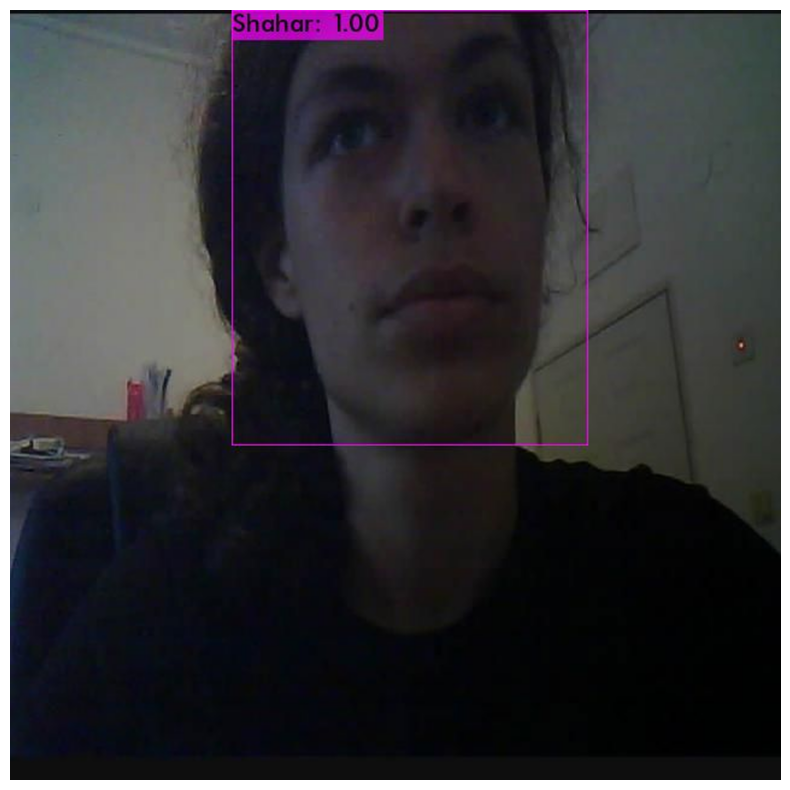

In [ ]:
%cd /content
%cp /content/dataset/train/_darknet.labels darknet/data/coco.names

%cd darknet
!./darknet detect /content/yolov4-tiny.cfg /content/backup/yolov4-tiny_final.weights /content/dataset/test/1048c373-589d-46df-bc5c-5698e4350fa7_jpeg.rf.d267231db69707669558be7c70655944.jpg -dont-show

imShow('/content/darknet/predictions.jpg')